[[154.78 153.57 152.9  ... 164.54 162.82 137.34]
 [154.78 152.13 152.41 ... 171.19 170.33 145.62]
 [155.5  152.13 152.48 ... 147.57 132.64 104.04]
 ...
 [ 43.19  43.82  44.22 ...  73.02  84.    83.84]
 [ 38.61  42.52  42.22 ...  84.3   90.61  90.24]
 [ 37.61  43.82  42.22 ...  88.63  94.17  96.94]]


Text(0.5, 1.0, 'Grayscale Image')

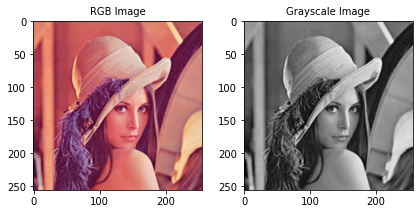

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

pic = Image.open("Lenna.jpg")

rgb = np.asarray(pic)

LennaGray = np.dot(rgb[...,:3], [0.21, 0.72, 0.07])
print(LennaGray)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout()
ax1.imshow(pic)
ax1.set_title("RGB Image", fontsize = 10)
ax2.imshow(LennaGray, cmap='gray')
ax2.set_title("Grayscale Image", fontsize = 10)
# plt.imshow(gray, cmap = 'gray')

(64, 64)


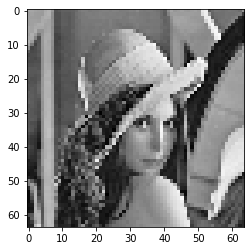

In [45]:
Lennagray_downsample = LennaGray[::4,::4]
print(Lennagray_downsample.shape)


plt.imshow(Lennagray_downsample, cmap = 'gray')
# plt.set_title("Downsampled Image", fontsize = 10)

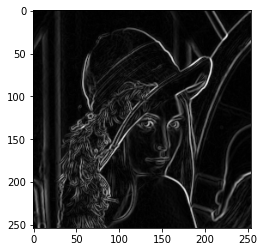

In [53]:
sobel_v = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

sobel_h = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])

filter_height, filter_width = sobel_v.shape
image_height, image_width = LennaGray.shape

result_height = image_height -filter_height + 1 # conv with no padding
result_width = image_width -filter_width + 1

result_v = np.zeros((result_height, result_width))
result_h = np.zeros((result_height, result_width))
result = np.zeros((result_height, result_width))

for i in range(result_height):
    for j in range(result_width):
        temp_v = LennaGray[i:filter_height+i, j:filter_width+j] * sobel_v
        temp_h = LennaGray[i:filter_height+i, j:filter_width+j] * sobel_h
        
        result_v[i][j] = np.sum(temp_v)
        result_h[i][j] = np.sum(temp_h)
        
result = np.sqrt(np.square(result_v) + np.square(result_h))
plt.imshow(result, cmap= 'gray')

Text(0, 0.5, 'Frequency')

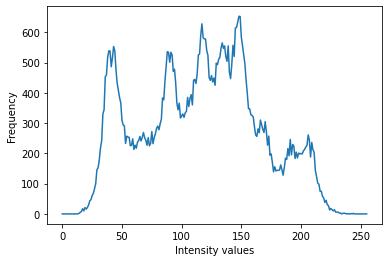

In [58]:
freq = np.zeros(256)

for i in range(256):
    for j in range(256):
        sample = int(LennaGray[i][j])
        freq[sample] += 1
        
# print(freq)
x = np.arange(256)

plt.plot(x, freq)
plt.xlabel("Intensity values")
plt.ylabel("Frequency")


Text(0, 0.5, 'Cumulative Frequency of occurrence')

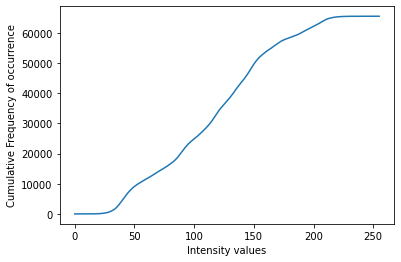

In [63]:
freq_acc = np.zeros(256)
freq_acc[0]=freq[0]

for i in range(256):
    freq_acc[i] = freq[i] + freq_acc[i-1]
    
plt.plot(x, freq_acc)
plt.xlabel("Intensity values")
plt.ylabel("Cumulative Frequency of occurrence")

In [ ]:
Lenna_histoeq = np.zeros((256,256))

for i in range(256):
    for j in range(256):
        sample = int(LennaGray[i][j])
        
        
        

256
